In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

C:\Users\Public\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"C:\Users\KISHOR WAGH\Downloads\Module-Supervised-Learning-Algorithm-In-Python-1 (1)\Datasets (1)\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
432,1,80,74,11,60,30.0,0.527,22,0
511,0,139,62,17,210,22.1,0.207,21,0
180,6,87,80,0,0,23.2,0.084,32,0
35,4,103,60,33,192,24.0,0.966,33,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df[df['Insulin']==0].shape

(374, 9)

In [47]:
df[df['Insulin']>200]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543.0,30.500000,0.158,53,1
13,1,189,60,23,846.0,30.100000,0.398,59,1
16,0,118,84,47,230.0,31.992578,0.551,31,1
20,3,126,88,41,235.0,39.300000,0.704,27,0
31,3,158,76,36,245.0,31.600000,0.851,28,1
...,...,...,...,...,...,...,...,...,...
707,2,127,46,21,335.0,34.400000,0.176,22,0
710,3,158,64,13,387.0,31.200000,0.295,24,0
713,0,134,58,20,291.0,26.400000,0.352,21,0
715,7,187,50,33,392.0,33.900000,0.826,34,1


In [48]:
 df[df['Insulin']>200].shape

(85, 9)

In [49]:
df[(df['Insulin']>200) & (df['Outcome']==1)].shape

(46, 9)

In [50]:
df[df['Glucose']>140].shape

(192, 9)

In [51]:
df[(df['Glucose']>140) & df['Outcome']==1].shape

(132, 9)

In [52]:
# Majority of the people having Glucose level greater than 140 has diabetes

In [53]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [54]:
df[(df['BMI']<18.5) | (df['BMI']>24.9)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.799479,33.600000,0.627,50,1
1,1,85,66,29,79.799479,26.600000,0.351,31,0
3,1,89,66,23,94.000000,28.100000,0.167,21,0
4,0,137,40,35,168.000000,31.992578,2.288,33,1
5,5,116,74,0,79.799479,25.600000,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.900000,0.171,63,0
764,2,122,70,27,79.799479,36.800000,0.340,27,0
765,5,121,72,23,112.000000,26.200000,0.245,30,0
766,1,126,60,0,79.799479,30.100000,0.349,47,1


In [55]:
df[(df['BMI']<18.5) | (df['BMI']>24.9)].shape

(666, 9)

In [56]:
df[((df['BMI']<18.5) | (df['BMI']>24.9)) & (df['Outcome']==1) & (df['Insulin']>200) & (df['Glucose']>140)].shape

(35, 9)

In [57]:
df[((df['BMI']<18.5) | (df['BMI']>24.9)) & (df['Outcome']==1)].shape

(261, 9)

In [58]:
df[df['Pregnancies']>0].shape
#Majority of the data is of females

(657, 9)

In [59]:
df[(df['Age']>50) & (df['Outcome']==1)].shape

(38, 9)

In [60]:
df['Age'][df['Outcome']==1].max()

70

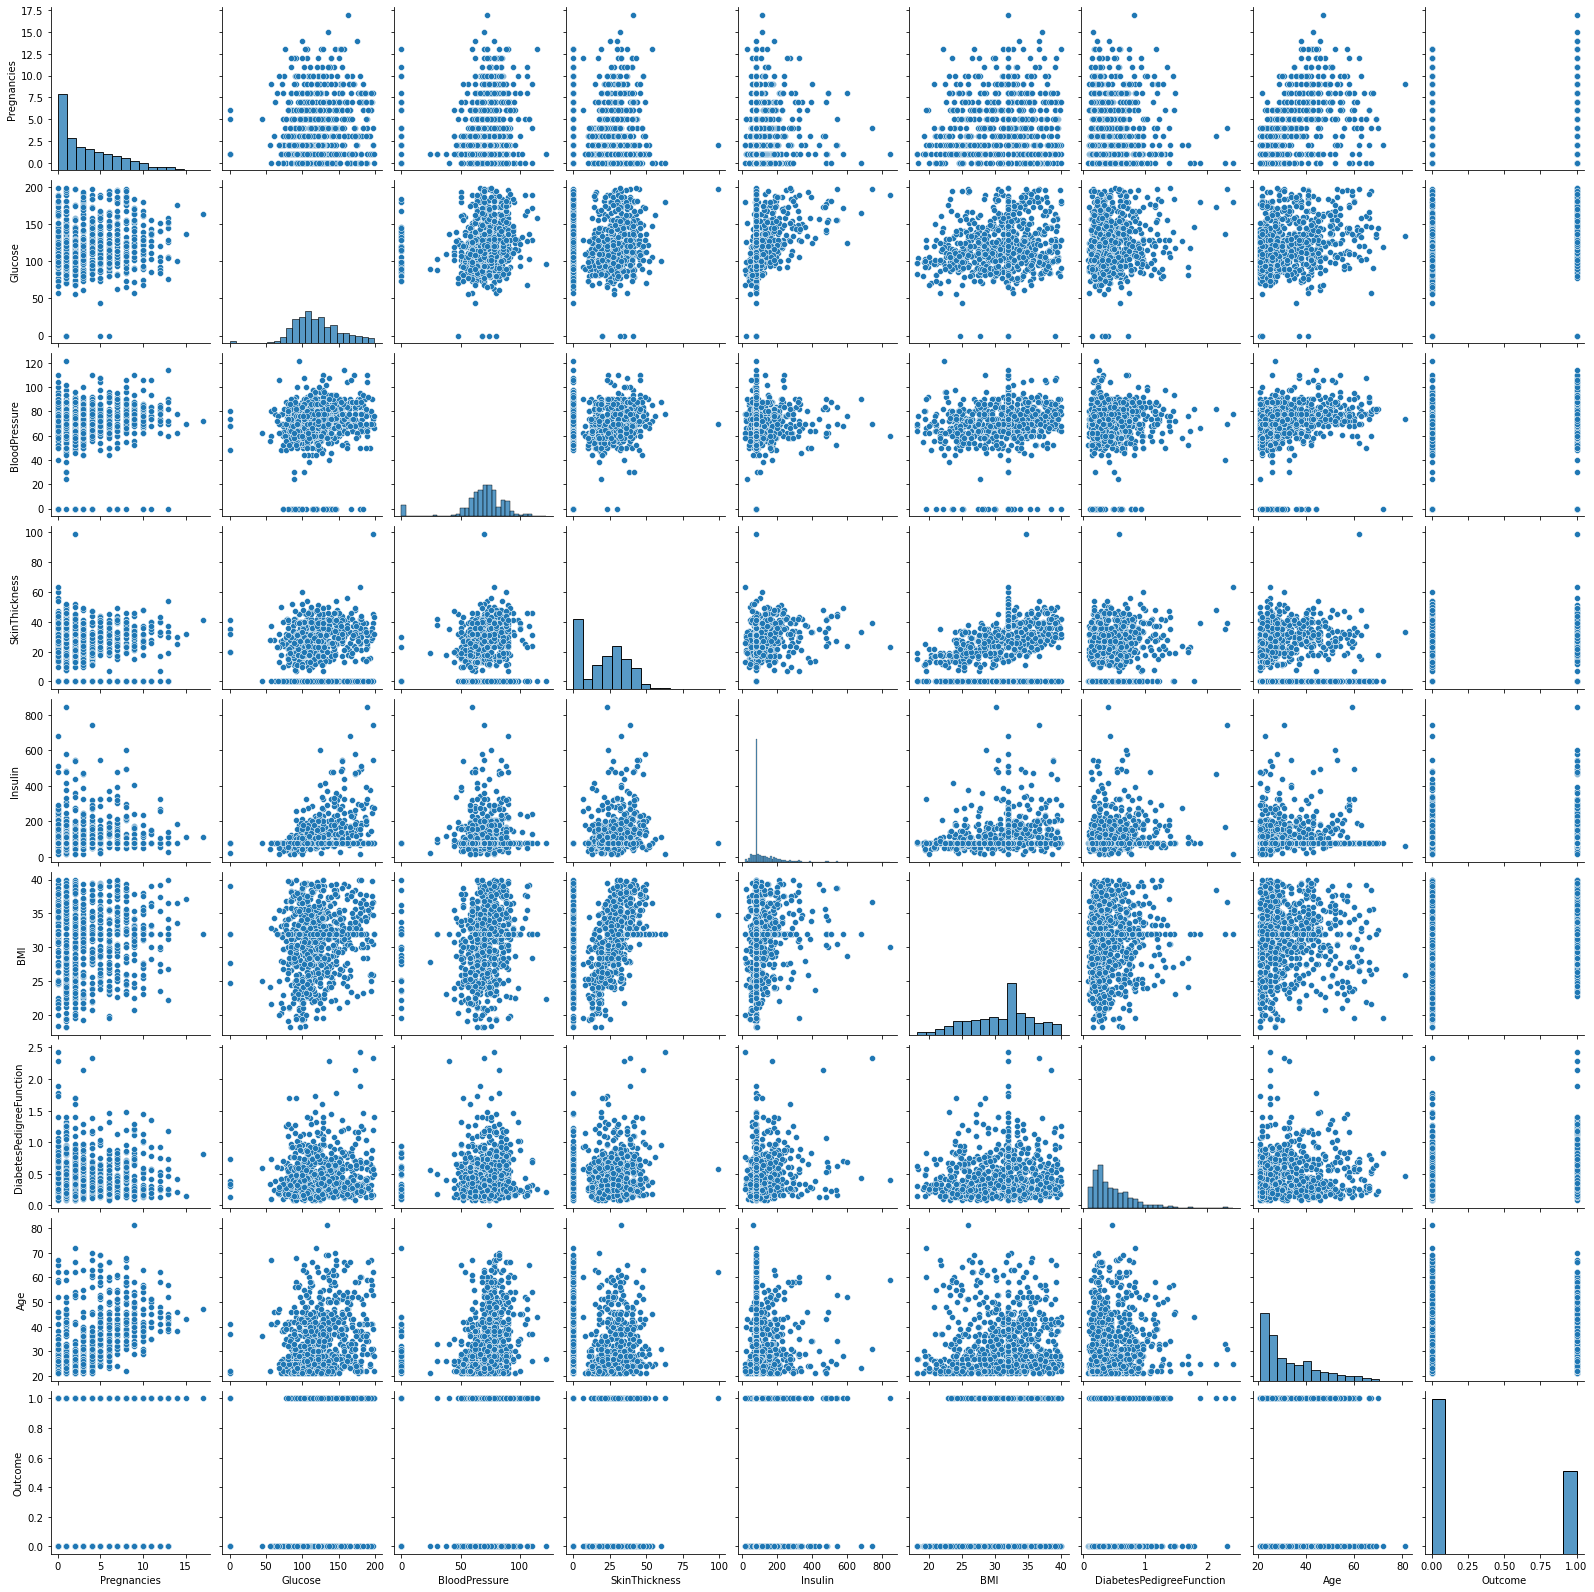

In [61]:
sns.pairplot(df)

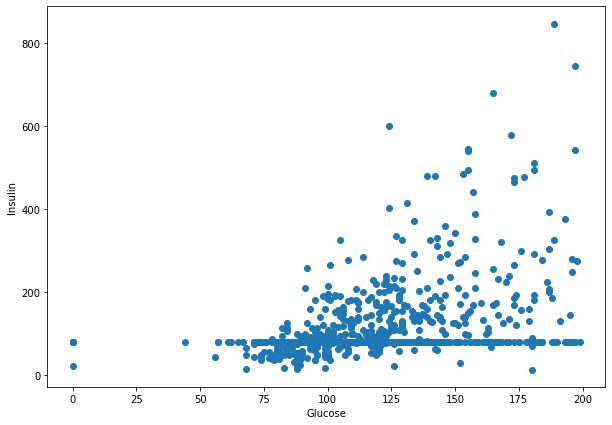

In [62]:
plt.figure(figsize=(10,7))
plt.scatter(x=df['Glucose'],y=df['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()


<AxesSubplot:>

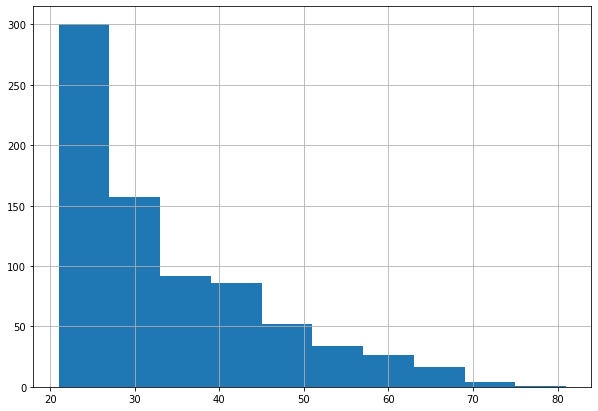

In [63]:
plt.figure(figsize=(10,7))
df['Age'].hist(grid=True,bins=10)

In [64]:
df['Age'].value_counts()
# Maximum people are between the age 22 to 27

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

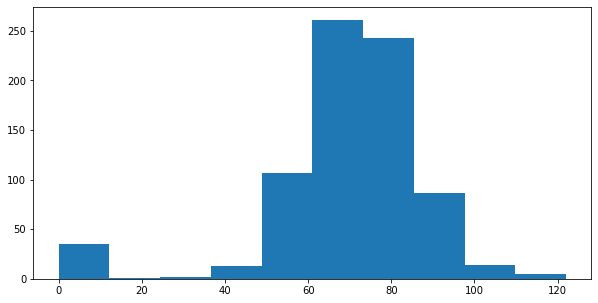

In [65]:
plt.figure(figsize=(10,5))
plt.hist(df['BloodPressure'],bins=10)
plt.show()

C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

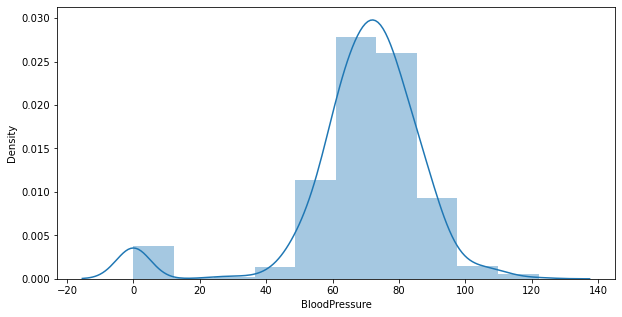

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(df['BloodPressure'],bins=10)

C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Public\anaconda3\lib\site-packages\seaborn\d

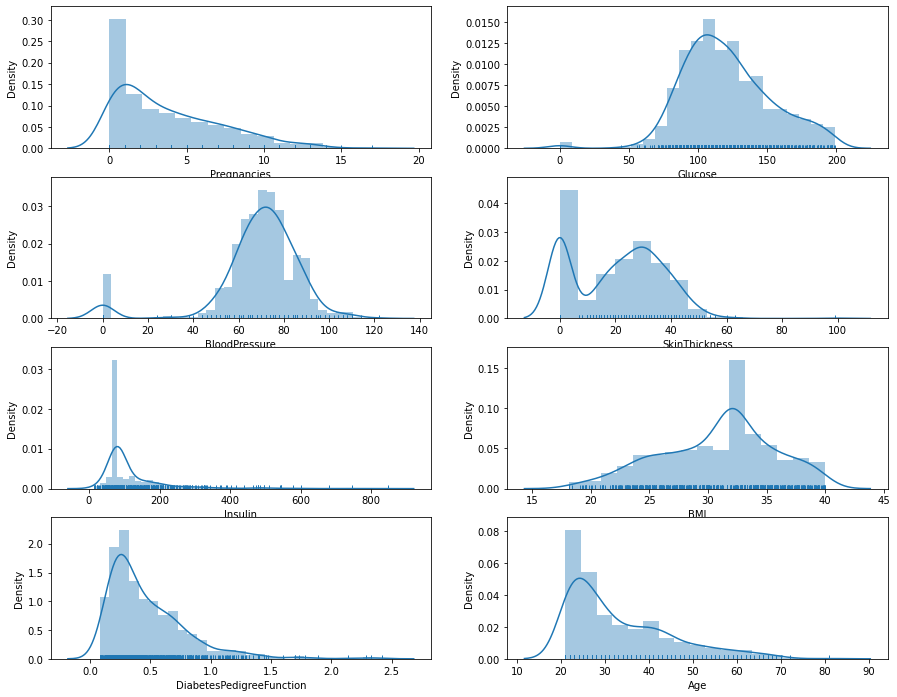

In [67]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(df['Pregnancies'],rug=True,ax=axs[0])
sns.distplot(df['Glucose'],rug=True,ax=axs[1])
sns.distplot(df['BloodPressure'],rug=True,ax=axs[2])
sns.distplot(df['SkinThickness'],rug=True,ax=axs[3])
sns.distplot(df['Insulin'],rug=True,ax=axs[4])
sns.distplot(df['BMI'],rug=True,ax=axs[5])
sns.distplot(df['DiabetesPedigreeFunction'],rug=True,ax=axs[6])
sns.distplot(df['Age'],rug=True,ax=axs[7])
plt.show()

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


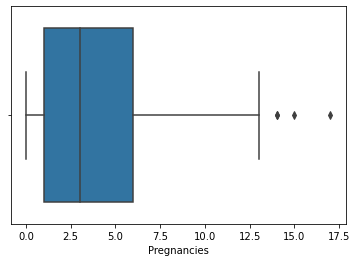

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


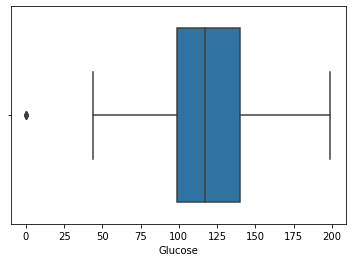

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


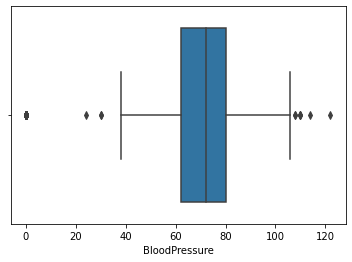

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


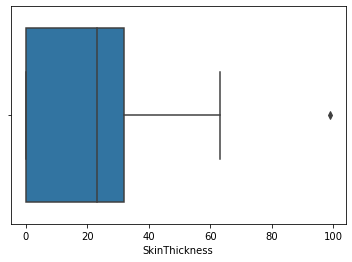

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


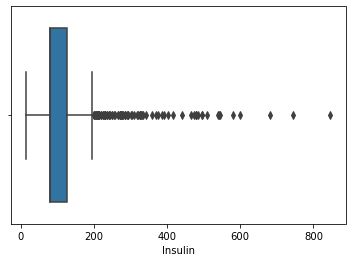

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


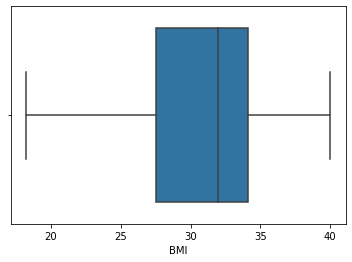

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


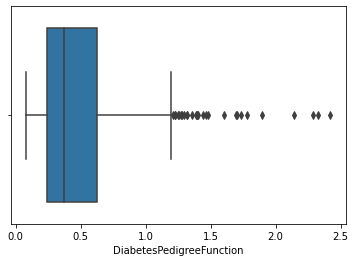

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


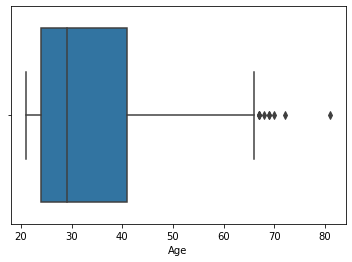

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


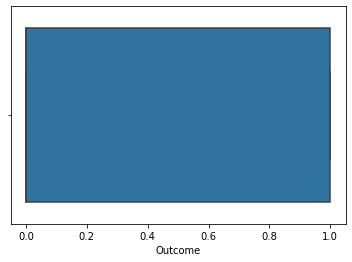

In [68]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [69]:
df["BMI"] = df["BMI"].apply(lambda x: df.BMI.mean() if (x>40 or x==0) else x)

In [70]:
df[df['BloodPressure']==0].shape


(35, 9)

In [71]:
df['Insulin'] = df['Insulin'].apply(lambda x: df.Insulin.mean() if x==0 else x)

In [72]:
df[df['Insulin']==0].shape

(0, 9)

In [73]:
df[df['Glucose']==0].shape

(5, 9)

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

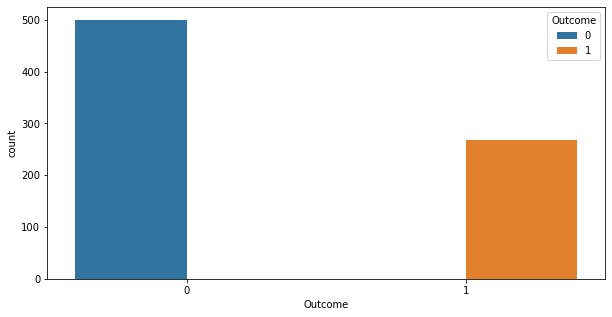

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outcome'],hue='Outcome',data=df)

<AxesSubplot:>

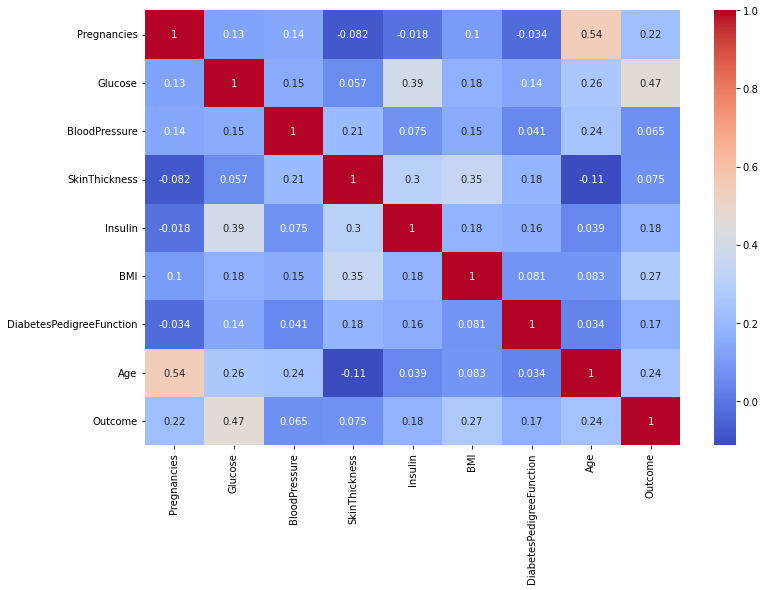

In [75]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:>

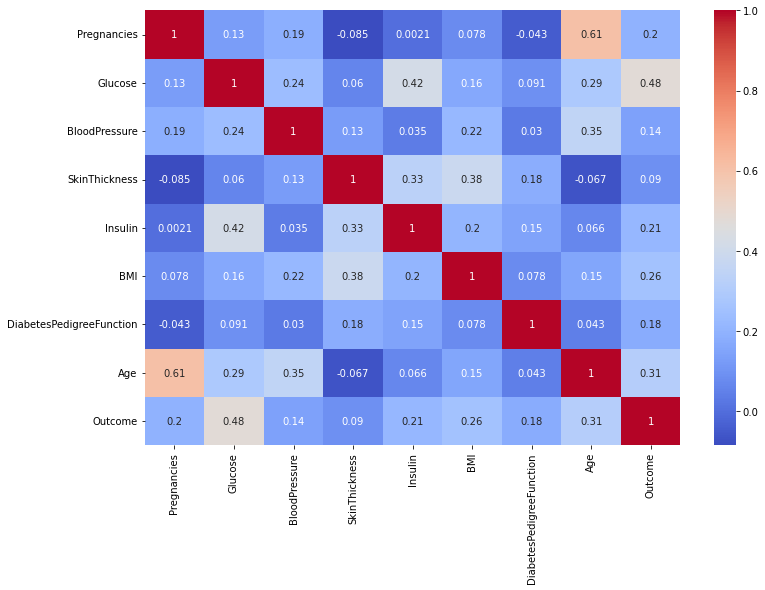

In [76]:
corr_spear = df.corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(corr_spear,annot=True,cmap='coolwarm')

In [77]:
X = df.iloc[:,:8]
y = df.iloc[:,8]

In [78]:
X.shape,y.shape

((768, 8), (768,))

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((537, 8), (231, 8))

In [80]:
lr = LogisticRegression()

In [81]:
lr.fit(X_train,y_train)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred=lr.predict(X_test)

In [83]:
accuracy_score(y_pred,y_test)*100

76.19047619047619

In [84]:
cm = confusion_matrix(y_test, y_pred)

<Figure size 864x576 with 0 Axes>

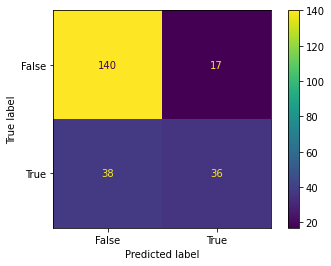

In [85]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
plt.figure(figsize=(12,8))
cm_display.plot()
plt.show()

In [86]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       178
           1       0.49      0.68      0.57        53

    accuracy                           0.76       231
   macro avg       0.69      0.73      0.70       231
weighted avg       0.80      0.76      0.77       231

